In [63]:
%matplotlib inline
import matplotlib.pyplot as plt 

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.utils import plot_model

In [21]:
# cargamos el horizonte de la serie a predecir con las features
df_v40_hour_h1 = pd.read_csv('pozo_izquierdo_torre_me_h_1.csv', delimiter=';')
df_v40_hour_h1.head()

,target_date,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,target
0,2004-07-01 00:10:00,9.6,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5
1,2004-07-01 00:11:00,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2
2,2004-07-01 00:12:00,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3
3,2004-07-01 00:13:00,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,11.7
4,2004-07-01 00:14:00,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,11.7,12.5


In [22]:
def dataframe_split(df):
    train_size = int((df.shape[0] * 80) / 100)
    # split: df in train and test sets
    df_train_set = df.iloc[0:train_size]
    df_test_set = df.iloc[train_size:]
    # split: train in train and validation sets
    df_train_set, df_validation_set = train_test_split(df_train_set, test_size=0.2)
    
    return {'train_set' : df_train_set,
            'validation_set': df_validation_set,
            'test_set': df_test_set}

In [23]:
data = dataframe_split(df_v40_hour_h1)
train_set = data['train_set']
validation_set = data['validation_set']
test_set = data['test_set']

In [24]:
train_set = train_set.fillna(0.0)
validation_set = validation_set.fillna(0.0)

In [25]:
features_columns = train_set.columns[1:-1]
target_column = train_set.columns[-1:]

features_train_set = train_set[features_columns]
target_train_set = train_set[target_column]
features_validation_set = validation_set[features_columns]
target_validation_set = validation_set[target_column]

In [48]:
# normalize values

In [117]:
n_input = 10
n_hidden = [10, 8, 4]
dropouts = [0, 0.4, 0.4]
n_output = 1

In [118]:
# -- topology
inputs = Input(shape=(n_input,), name='Input-Layer')
normalization_batch = BatchNormalization(axis =-1,epsilon=0.02,momentum=0.97,
                                         name='normalization_batch')(inputs)
for neurons, dropout, layer in zip(n_hidden, dropouts, range(len(n_hidden))):
    if layer == 0:
        x = Dense(neurons, activation='relu', name='Hidden_{0}'.format(layer))(normalization_batch)
        if dropout != 0:
            x = Dropout(dropout)(x)
    else:
        x = Dense(neurons, activation='relu', name='Hidden_{0}'.format(layer))(x)
        if dropout != 0:
            x = Dropout(dropout)(x)
predictions = Dense(n_output, activation='linear', name='Output-Layer')(x)
model = Model(inputs=inputs, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input-Layer (InputLayer)     (None, 10)                0         
_________________________________________________________________
normalization_batch (BatchNo (None, 10)                40        
_________________________________________________________________
Hidden_0 (Dense)             (None, 10)                110       
_________________________________________________________________
Hidden_1 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_23 (Dropout)         (None, 8)                 0         
_________________________________________________________________
Hidden_2 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_24 (Dropout)         (None, 4)                 0         
__________

In [119]:
plot_model(model, to_file='mlp_topology.png',
           show_shapes=True, show_layer_names=True, rankdir='LR')

<img src="mlp_topology.png">

In [120]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [121]:
print(features_train_set.values.shape)
epochs = 100
batch = 5000

(55752, 10)


In [122]:
history = model.fit(features_train_set.values, target_train_set.values,
                    batch_size=batch, epochs=epochs,
                    #callbacks
                    validation_data=(features_validation_set.values, 
                                     target_validation_set.values))

Train on 55752 samples, validate on 13938 samples
Epoch 1/100
55752/55752 [==============================] - 1s 22us/step - loss: 115.6929 - mean_absolute_error: 10.0923 - val_loss: 18.9211 - val_mean_absolute_error: 4.1365
Epoch 2/100
55752/55752 [==============================] - 0s 3us/step - loss: 105.6024 - mean_absolute_error: 9.6267 - val_loss: 27.0553 - val_mean_absolute_error: 4.9821
Epoch 3/100
55752/55752 [==============================] - 0s 3us/step - loss: 97.1593 - mean_absolute_error: 9.1715 - val_loss: 33.1792 - val_mean_absolute_error: 5.5012
Epoch 4/100
55752/55752 [==============================] - 0s 3us/step - loss: 89.4431 - mean_absolute_error: 8.7127 - val_loss: 37.0860 - val_mean_absolute_error: 5.7846
Epoch 5/100
55752/55752 [==============================] - 0s 3us/step - loss: 83.5533 - mean_absolute_error: 8.3424 - val_loss: 38.8298 - val_mean_absolute_error: 5.8780
Epoch 6/100
55752/55752 [==============================] - 0s 3us/step - loss: 78.7198 - me

55752/55752 [==============================] - 0s 3us/step - loss: 35.6018 - mean_absolute_error: 4.7127 - val_loss: 11.8874 - val_mean_absolute_error: 3.1290
Epoch 49/100
55752/55752 [==============================] - 0s 2us/step - loss: 35.1493 - mean_absolute_error: 4.6922 - val_loss: 11.3998 - val_mean_absolute_error: 3.0752
Epoch 50/100
55752/55752 [==============================] - 0s 2us/step - loss: 35.5031 - mean_absolute_error: 4.7035 - val_loss: 11.7476 - val_mean_absolute_error: 3.1040
Epoch 51/100
55752/55752 [==============================] - 0s 2us/step - loss: 35.1735 - mean_absolute_error: 4.6858 - val_loss: 11.4031 - val_mean_absolute_error: 3.0713
Epoch 52/100
55752/55752 [==============================] - 0s 2us/step - loss: 34.5858 - mean_absolute_error: 4.6456 - val_loss: 11.1968 - val_mean_absolute_error: 3.0412
Epoch 53/100
55752/55752 [==============================] - 0s 2us/step - loss: 34.7773 - mean_absolute_error: 4.6475 - val_loss: 11.1002 - val_mean_abso

Epoch 96/100
55752/55752 [==============================] - 0s 3us/step - loss: 29.1495 - mean_absolute_error: 4.2110 - val_loss: 8.7998 - val_mean_absolute_error: 2.6821
Epoch 97/100
55752/55752 [==============================] - 0s 5us/step - loss: 28.8293 - mean_absolute_error: 4.1785 - val_loss: 8.7149 - val_mean_absolute_error: 2.6721
Epoch 98/100
55752/55752 [==============================] - 0s 3us/step - loss: 28.8256 - mean_absolute_error: 4.1759 - val_loss: 8.6991 - val_mean_absolute_error: 2.6718
Epoch 99/100
55752/55752 [==============================] - 0s 2us/step - loss: 28.8371 - mean_absolute_error: 4.1768 - val_loss: 9.0116 - val_mean_absolute_error: 2.7125
Epoch 100/100
55752/55752 [==============================] - 0s 2us/step - loss: 28.6064 - mean_absolute_error: 4.1603 - val_loss: 8.8616 - val_mean_absolute_error: 2.6884


In [123]:
history.history.keys()

dict_keys(['mean_absolute_error', 'val_mean_absolute_error', 'val_loss', 'loss'])

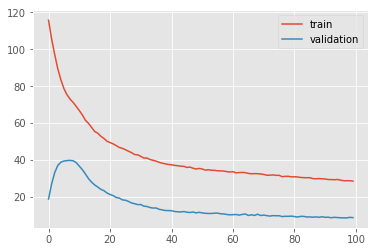

In [126]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

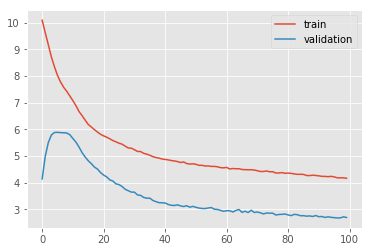

In [128]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.legend()

In [129]:
features_test_set = test_set[features_columns]
predicted = model.predict(features_test_set.values)

In [130]:
df_target = test_set[['target_date', 'target']]
df_target.set_index(['target_date'], inplace=True)
df_target.head(5)

,target
target_date,
2004-08-19 21:36:00,11.7
2004-08-19 21:37:00,12.2
2004-08-19 21:38:00,11.2
2004-08-19 21:39:00,10.2
2004-08-19 21:40:00,10.1


In [131]:
df_target.loc[:, 'predicted'] = predicted[:,0]

/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/pandas/core/indexing.py:561: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [132]:
df_target

,target,predicted
target_date,,
2004-08-19 21:36:00,11.7,8.567653
2004-08-19 21:37:00,12.2,8.464381
2004-08-19 21:38:00,11.2,8.629628
2004-08-19 21:39:00,10.2,8.492764
2004-08-19 21:40:00,10.1,8.305281
2004-08-19 21:41:00,9.8,7.963768
2004-08-19 21:42:00,9.4,7.792343
2004-08-19 21:43:00,10.8,7.633560
2004-08-19 21:44:00,10.8,8.186681


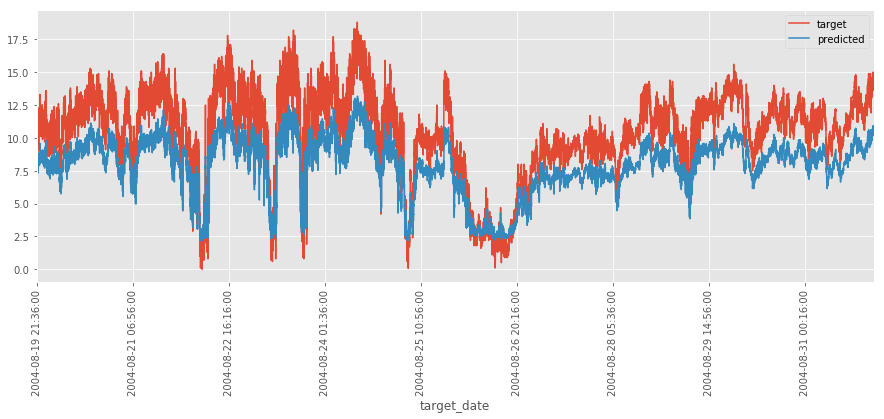

In [133]:
df_target.plot(figsize=(15,5), rot=90)

In [134]:
df_target.loc[:,'bias'] = df_target['target'] - df_target['predicted']

/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


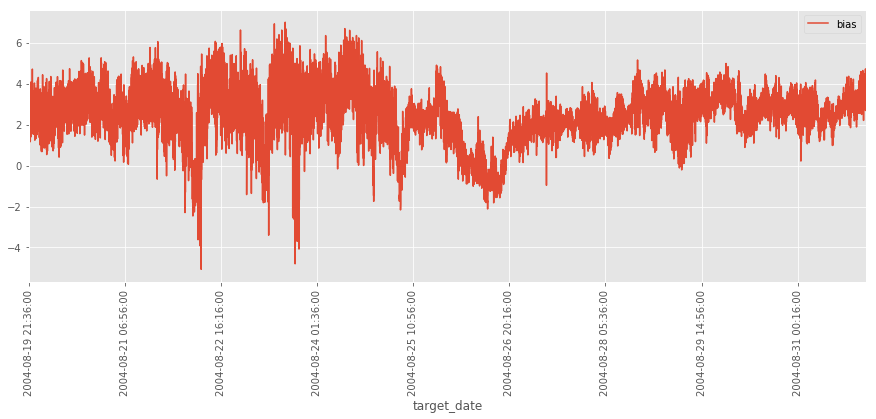

In [135]:
df_target[['bias']].plot(figsize=(15,5), rot=90)